<a href="https://colab.research.google.com/github/santos-luciano/reddit_collect/blob/main/Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.2 MB/s eta 0:00:00


In [5]:
import praw
import pandas as pd
reddit = praw.Reddit(
    client_id="5gzN-N3yiwaawbtRDTniCw",
    client_secret="gQzhykzk0MQ4yiWaYJrrpGRf-fUgpw",
    user_agent="meu_script:v1.0 (by u/LegFantastic551)"
)

In [6]:
submission = reddit.submission(id="1b50d6q")
submission.comments.replace_more(limit=0)

data = []
for comment in submission.comments.list():
    data.append({
        "post_title": submission.title,
        "comment_body": comment.body,
        "comment_score": comment.score,
        "comment_author": str(comment.author)
    })

df = pd.DataFrame(data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [7]:
df.head()

,post_title,comment_body,comment_score,comment_author
0,Oque acham do projeto da ponte Salavdor-Itapar...,##Sejam Bem-Vindos! \nPedimos que sigam as **[...,1,AutoModerator
1,Oque acham do projeto da ponte Salavdor-Itapar...,O serviço péssimo do ferry parece até lobby pr...,20,croninhos2
2,Oque acham do projeto da ponte Salavdor-Itapar...,Espero seja concluída. Porque vai ficar bonito...,14,VisibleListen9513
3,Oque acham do projeto da ponte Salavdor-Itapar...,Eu soube que vai inaugurar em 2014,31,Cabo_Martim
4,Oque acham do projeto da ponte Salavdor-Itapar...,Dizem que isso ia acabar com a ilha. Ia virar ...,11,None


In [8]:
from transformers import pipeline

# Carrega modelo multilíngue de sentimento (funciona em português)
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

political_negatives = ["superfaturada", "corrupção", "ineficiente", "vergonha", "fracasso"]

def sentiment_custom(comment):
    # Prioriza termos políticos
    if any(word in comment.lower() for word in political_negatives):
        return "negativo"
    else:
        # Usa modelo BERT para o resto
        res = classifier(comment)[0]
        stars = int(res['label'][0])
        if stars <= 2:
            return "negativo"
        elif stars == 3:
            return "neutro"
        else:
            return "positivo"

# Classificar cada comentário
resultados = [sentiment_custom(c) for c in df.comment_body]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [72]:
# Mostrar resultados
for c, r in zip(df.comment_body, resultados):
    print(f"{c} -> {r}")


##Sejam Bem-Vindos! 
Pedimos que sigam as **[Regras da Comunidade](https://www.reddit.com/r/Salvador/about/rules)**. Caso precise tirar dúvidas mais profundas, entre em contato através do nosso **[ModMail](https://www.reddit.com/message/compose?to=/r/Salvador)**. 

*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Salvador) if you have any questions or concerns.* -> positivo
O serviço péssimo do ferry parece até lobby pra ponte. Todo mundo quer -> negativo
Espero seja concluída. Porque vai ficar bonito vê ela sobre essas águas. -> positivo
Eu soube que vai inaugurar em 2014 -> neutro
Dizem que isso ia acabar com a ilha. Ia virar mais um bairro de Salvador. Tendo a acreditar. Mas ajudaria muita gente também. -> neutro
Morei lá um tempo atrás. Penso que a ponte transformaria Itaparica em uma Niterói. -> neutro
Se com o metro já deu para desviar imagina com a ponte. -> neutro
Eu era criança tavam dizendo que

In [15]:
df.comment_body[1:].str.cat(sep=' ')

'O serviço péssimo do ferry parece até lobby pra ponte. Todo mundo quer Espero seja concluída. Porque vai ficar bonito vê ela sobre essas águas. Eu soube que vai inaugurar em 2014 Dizem que isso ia acabar com a ilha. Ia virar mais um bairro de Salvador. Tendo a acreditar. Mas ajudaria muita gente também. Morei lá um tempo atrás. Penso que a ponte transformaria Itaparica em uma Niterói. Se com o metro já deu para desviar imagina com a ponte. Eu era criança tavam dizendo que essa pronta logo logo ficava pronta \nJá sou adulto Acho massa, mas queria que os chineses metessem uns trem de alta velocidade aqui logo, ao invés dos carros elétricos\n\nDeixa os EUA se lascar pra lá com modal rodoviário Uma coisa que pouco se discute é o impacto ambiental que vai gerar durante a construção da ponte, acho que o transporte aquático de qualidade seria mais viável Metrô 2 eu ja morei na ilha e eu posso dizer com absoluta certeza (e tristeza) que nenhum dos municípios está pronto para o fluxo que está 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


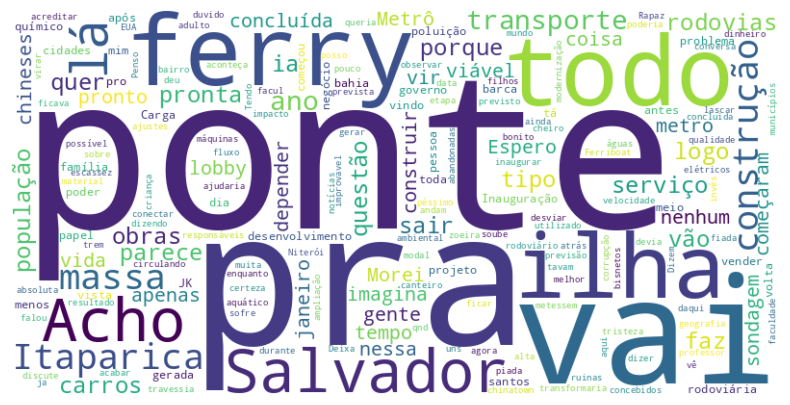

In [17]:
# Instalar se ainda não tiver
# pip install wordcloud matplotlib nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Baixar stopwords em português
nltk.download('stopwords')

# Texto de exemplo
texto = df.comment_body[1:].str.cat(sep=' ')

# Lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Gerar nuvem de palavras
nuvem = WordCloud(width=800, height=400,
                  background_color='white',
                  stopwords=stop_words,
                  collocations=False).generate(texto)

# Mostrar resultado
plt.figure(figsize=(10,5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.show()


,post_title,comment_body,comment_score,comment_author,sentiment,sentiment_label,sentiment_tb,sentiment_label_tb
0,No concurso de ideia mais burra para resolver ...,"""O Novo é diferente, é top, é moderno.""",226,Tonho_O_Faxineiro,0.2023,positivo,0.500000,positivo
1,No concurso de ideia mais burra para resolver ...,Zema é 100% de aproveitamento zero.,158,AlbatrossOk6223,0.0000,neutro,0.000000,neutro
2,No concurso de ideia mais burra para resolver ...,Sair do BRICS é falir a bancada do agronegócio...,41,CrisBrl93,0.0000,neutro,0.000000,neutro
3,No concurso de ideia mais burra para resolver ...,[deleted],138,None,0.0000,neutro,0.000000,neutro
4,No concurso de ideia mais burra para resolver ...,E ainda tem um monte de desavisado que vai vot...,17,Tall-Series-1091,-0.5267,negativo,0.000000,neutro
...,...,...,...,...,...,...,...,...
90,No concurso de ideia mais burra para resolver ...,"Cara, não faço ideia. Mas a gente sabe informa...",7,AppropriateBreak1076,-0.5267,negativo,0.000000,neutro
91,No concurso de ideia mais burra para resolver ...,"sim, muito pior mesmo. Você está super fragili...",2,fuckyesnewuser,0.6360,positivo,0.416667,positivo
92,No concurso de ideia mais burra para resolver ...,As vezes o mano virou comunista e você pode re...,3,GrievousBR,0.0000,neutro,0.000000,neutro
93,No concurso de ideia mais burra para resolver ...,"Rsrsrs pior que as aulas dele eram massa, só s...",3,AppropriateBreak1076,-0.2960,negativo,0.000000,neutro
